# Regression

Regression searches for relationships among variables. The goal is to find a function that maps independent variables to dependent variables sufficiently well.



In regression, we have:
- Dependent features: Also known as dependent variables, outputs, or responses.
- Independent features: Also known as independent variables, inputs, or predictors.


Regression problems usually have one continuous  and unbounded dependent varible


#Linear regression

 The linear regression equation is: y = c0*x0 + c1*x1 + ... + β
 Here, β represents random error, c0, c1, ... are regression coefficients, and x0, x1, ... are independent variables.


it calculates the estimators of the regression coefficients c0,c1....
They define the estimated regression function  f(x) = c0+c1x1 ......
This function should capture dependencies betwn the inputs and outputs well


The estimated response f(x) should be close to the actual response (y).
The differences between them are called residuals, and we want to minimize the sum of squared residuals (SSR).
This method is called the method of ordinary least squares.


# Regression performance
The coefficient of determination R^2 indicates the amount of variation in y that can be explained by the dependence on x using a particular regression model.
 A larger R^2 value indicates a better fit.
 If R^2 = 1, then SSR = 0.


Underfitting occurs when the model does not fit the data points well.
 Overfitting occurs when the model fits the data points too well, including noise.
 We want to find a balance and avoid both underfitting and overfitting.


In [ ]:
#implementation using scikit learn
import numpy as np
from sklearn.linear_model import LinearRegression



In [ ]:
# Linear Regression Example
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [ ]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [ ]:
y

array([ 5, 20, 14, 32, 22, 38])

In [ ]:
# let's create a model to fit it
model = LinearRegression()
model.fit(x, y)



LinearRegression()

In [ ]:
#let's score the model now
r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.7158756137479542


In [ ]:
y_pred = model.predict(x)
print(y_pred)

[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [ ]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])



In [ ]:
#now to transorm the data
transformer = PolynomialFeatures(degree=2,include_bias=False)
transformer.fit(x)
x_=transformer.transform(x)
#x_=PolynomialFeatures(degree=2,include_bias=False).fit_transform(x)
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [ ]:
model.fit(x_,y)

LinearRegression()

In [ ]:
r_sq=model.score(x_,y)
print("coefficient of determination ",r_sq)
print("intercept",model.intercept_)
print("coefficients ",model.coef_)

coefficient of determination  0.8908516262498564
intercept 21.372321428571425
coefficients  [-1.32357143  0.02839286]


In [ ]:
y_pred = model.predict(x_)
print(y_pred)

[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shaaguunzz","key":"76ff8d7f3bfe2be940673a02748b71a5"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d srolka/ecommerce-customers

  0% 0.00/43.1k [00:00<?, ?B/s]
100% 43.1k/43.1k [00:00<00:00, 4.76MB/s]


In [ ]:
!unzip ecommerce-customers

Archive:  ecommerce-customers.zip
  inflating: Ecommerce Customers.csv  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Ecommerce Customers.csv")

In [ ]:
# to print some datas
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


so we have 500 entries with 8 columns

In [ ]:
# Generate descriptive statistics
df.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


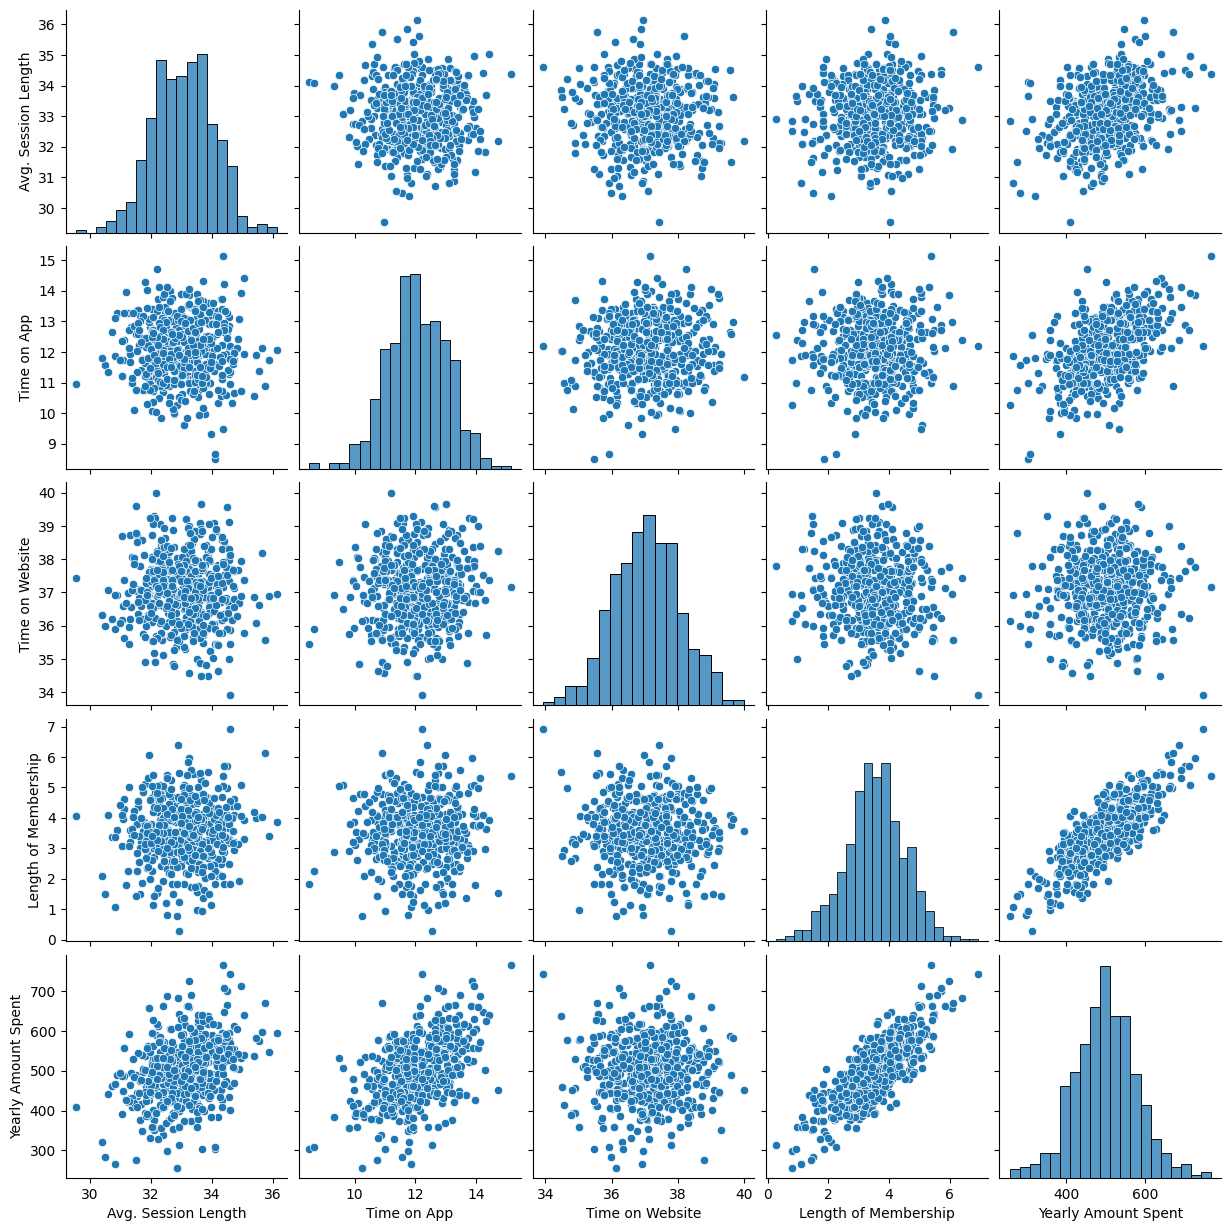

In [ ]:
# Pairplot visualization
sns.pairplot(df)


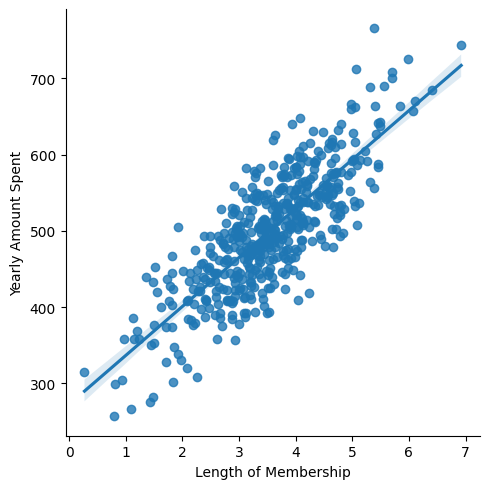

In [ ]:
# Scatter plot with linear regression line
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

let's split the data into training and testng data  . we want to predict Yearly Amount Spent

In [ ]:
# Split the data into training and testing sets
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


In [ ]:
# to split the data
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

let's train the model

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [ ]:
# Get model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]
Intercept: -1047.9327822502391


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

Text(0, 0.5, 'Y Predicted')

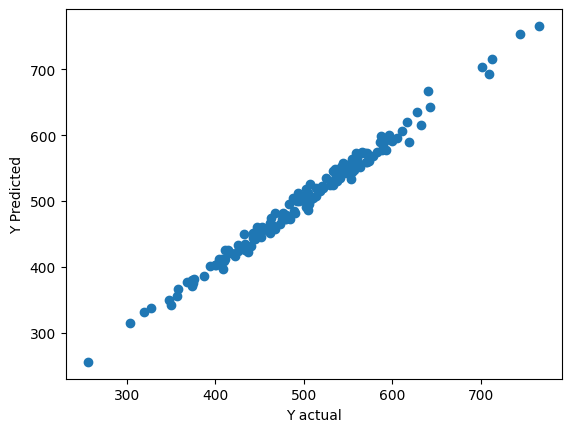

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y actual')
plt.ylabel('Y Predicted')

it is looking good
let's evaluate the model

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.228148653430826
Mean Squared Error: 79.81305165097427
Root Mean Squared Error: 8.933815066978624


# Ridge Regression example

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha=0.01 )
ridge2 = Ridge(alpha=0.01 )


In [ ]:
ridge.fit(X_train,y_train)
ridge2.fit(X_train,y_train)

Ridge(alpha=0.01)

In [ ]:
print("Ridge Coefficients:", ridge.coef_)
print("Ridge2 Coefficients:", ridge2.coef_)
print("Ridge Intercept:", ridge.intercept_)
print("Ridge2 Intercept:", ridge2.intercept_)

Ridge Coefficients: [25.98078404 38.58893923  0.19044516 61.27734246]
Ridge2 Coefficients: [25.98078404 38.58893923  0.19044516 61.27734246]
Ridge Intercept: -1047.8880823922027
Ridge2 Intercept: -1047.8880823922027


In [ ]:
y_ridge=ridge.predict(X_test)
y_ridge2=ridge2.predict(X_test)

Text(0, 0.5, 'Y Predicted')

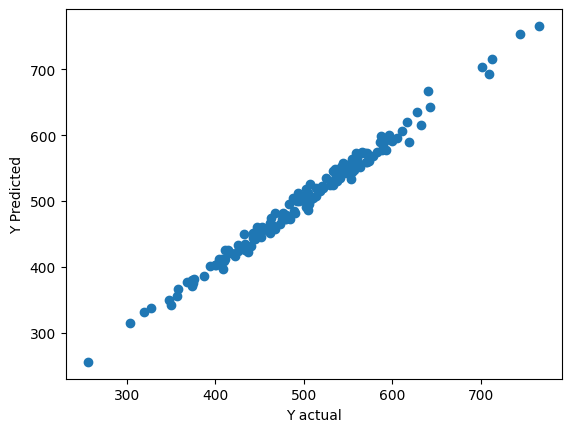

In [ ]:
plt.scatter(y_test,y_ridge)
plt.xlabel('Y actual')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Y Predicted')

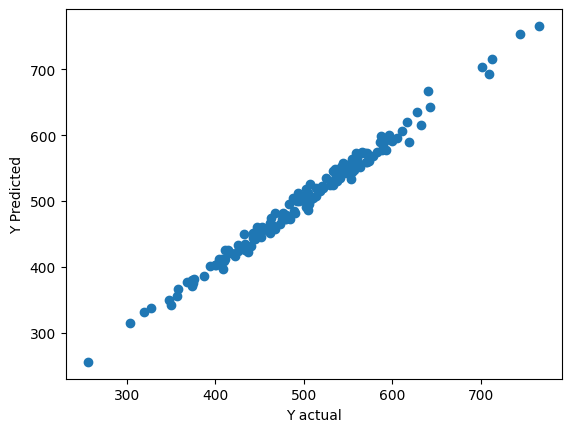

In [ ]:
plt.scatter(y_test,y_ridge2)
plt.xlabel('Y actual')
plt.ylabel('Y Predicted')

# Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.01 )
lasso2= Lasso(alpha=0.01 )


In [ ]:
lasso.fit(X_train,y_train)
lasso2.fit(X_train,y_train)


Lasso(alpha=0.01)

In [ ]:
print("Lasso Predictions:", lasso.predict(X_test))
print("Lasso2 Predictions:", lasso2.predict(X_test))
print("Lasso Coefficients:", lasso.coef_)
print("Lasso2 Coefficients:", lasso2.coef_)
print("Lasso Intercept:", lasso.intercept_)
print("Lasso2 Intercept:", lasso2.intercept_)


Lasso Predictions: [456.43159236 402.72894431 409.27184579 591.40629455 589.99923563
 548.80890977 577.59730297 715.38089455 473.80071242 545.90997902
 337.89179938 500.37532097 552.90866466 409.63214189 765.46052442
 545.83966057 693.22500051 507.31953828 573.08529794 573.19178643
 397.48771861 555.09285397 458.18013209 482.67713449 559.26469661
 413.02631529 532.24794475 377.66226321 535.01612985 447.79468908
 595.52067156 667.09141619 511.94761427 573.3016885  505.0128925
 565.27552891 460.41080701 449.76692508 422.88668339 456.56001754
 598.10270421 449.64039547 615.31329391 511.89046979 504.37056527
 515.95787778 568.65650926 551.59334254 356.60507431 464.99766595
 481.66714629 534.21106739 256.34470269 505.30968904 520.01178917
 315.06831631 501.96492701 387.05426318 472.97093043 432.88866296
 539.77285367 590.01821658 752.84896831 558.2768     523.71606221
 431.79607766 425.38836548 518.73380953 641.95510272 481.84989177
 549.68193144 380.95293381 555.16434451 403.44429259 472.5

In [ ]:
y_lasso = lasso.predict(X_test)
y_lasso2 = lasso2.predict(X_test)


Text(0, 0.5, 'Y Predicted')

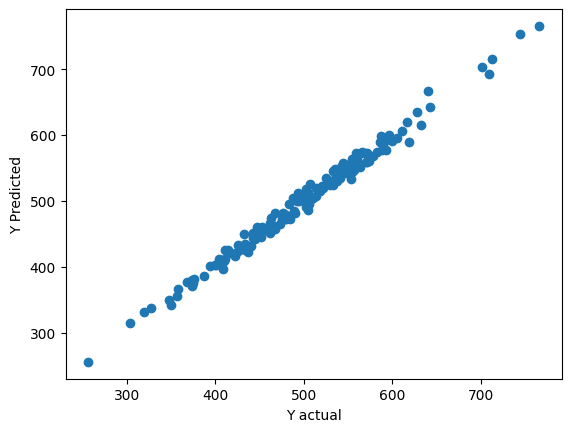

In [ ]:
plt.scatter(y_test,y_lasso)
plt.xlabel('Y actual')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Y Predicted')

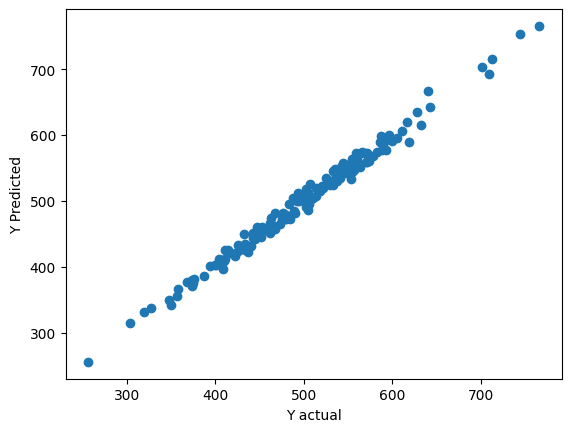

In [ ]:
plt.scatter(y_test,y_lasso2)
plt.xlabel('Y actual')
plt.ylabel('Y Predicted')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Coefficients: [-1.81112549e+00  3.09961190e-02 -3.92949547e+01  3.92949547e+01]
Intercept: -262.96895213454013


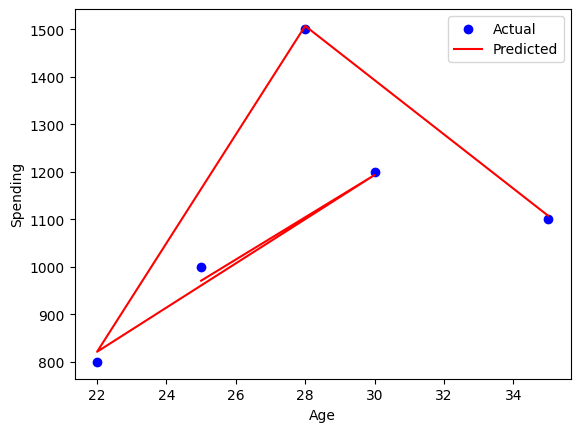

In [ ]:
# Multiple linear regression with categorical variables
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Sample data
data = {'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'Age': [25, 30, 22, 28, 35],
        'Income': [40000, 50000, 35000, 60000, 45000],
        'Spending': [1000, 1200, 800, 1500, 1100]}

df = pd.DataFrame(data)

# One-hot encode the 'Gender' variable
encoder = OneHotEncoder(sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])

# Combine the encoded features with the numerical features
X = pd.concat([df[['Age', 'Income']], pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))], axis=1)
y = df['Spending']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
# Plot the results
plt.scatter(df['Age'], y, color='blue', label='Actual')
plt.plot(df['Age'], model.predict(X), color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.legend()
plt.show()


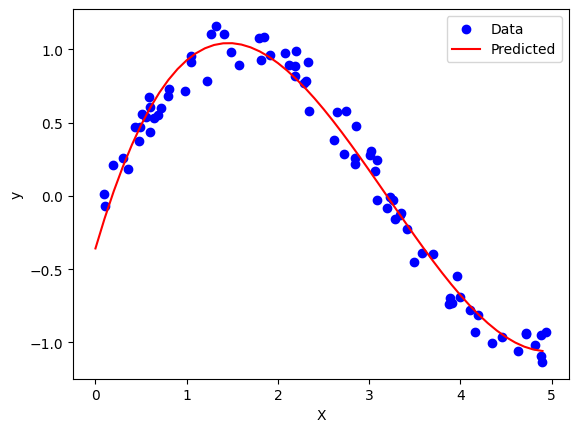

In [ ]:
#polynomial regression with multiple features
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Fit a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Predict
X_test = np.arange(0, 5, 0.1)[:, np.newaxis]
X_test_poly = poly_features.transform(X_test)
y_pred = model.predict(X_test_poly)

# Plot the results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# ridge regression with normalization

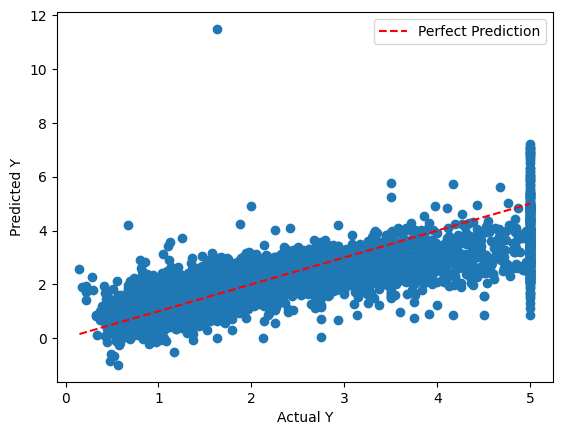

Mean Squared Error: 0.5305437338152266


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform feature scaling (Normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge Regression model with normalization
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_scaled, y_train)

# Predict
y_pred = ridge.predict(X_test_scaled)

# Plot the results
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


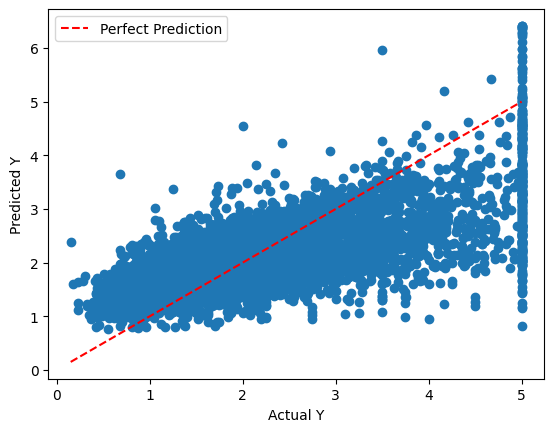

Mean Squared Error: 0.6648117801052061
Selected Features by Lasso: ['MedInc', 'HouseAge', 'Latitude']


In [ ]:
#lasso regression with feature selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# Perform feature scaling (Normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso Regression model with normalization
alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

# Predict
y_pred = lasso.predict(X_test_scaled)

# Plot the results
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display the features selected by Lasso
# Display the features selected by Lasso
selected_features = [data.feature_names[i] for i in range(len(data.feature_names)) if lasso.coef_[i] != 0]
print("Selected Features by Lasso:", selected_features)



Linear Regression: It is a simple and widely used regression technique to model the relationship between dependent and independent variables. It works best when there is a linear relationship between the variables.

Use cases: Predicting house prices based on area, predicting sales based on advertising spend, predicting exam scores based on study hours, etc.

Polynomial Regression: It extends linear regression by introducing polynomial features to capture non-linear relationships between variables.

Use cases: Predicting stock prices, modeling the growth of organisms, analyzing temperature variations over time, etc.

Multiple Linear Regression: It involves multiple independent variables and can capture complex relationships.

Use cases: Predicting housing prices considering multiple features (area, bedrooms, bathrooms, location), predicting revenue considering various marketing and operational factors.

Ridge Regression: A regularized linear regression technique that adds a penalty term to prevent overfitting.

Use cases: When dealing with multicollinearity (high correlation between features), preventing overfitting in large datasets.

Lasso Regression: Another regularized linear regression technique that can perform feature selection by setting some coefficients to zero.

Use cases: Feature selection in high-dimensional datasets, sparse feature regression.



Normalization: It is essential to scale the data before training regression models, especially when using regularization techniques like Ridge and Lasso.

Use cases: Scaling features with different units, ensuring convergence and preventing features from dominating the model.

Feature Selection: Lasso Regression demonstrated feature selection by setting less important coefficients to zero.

Use cases: Identifying important features for a model, reducing dimensionality in high-dimensional datasets.

Performance Evaluation: We evaluated the regression models using Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.

Use cases: Evaluating model accuracy, comparing models' performance.

Regression techniques find applications in various domains such as finance, real estate, healthcare, sales, marketing, and more. They help in predicting continuous variables based on historical data and identifying relationships between variables. They are also used for time series forecasting, anomaly detection, and pattern recognition.